# Actividad: Eigenfaces - Valores y Vectores Propios en Reconocimiento Facial

## 📋 Información General
- **Tiempo:** 2 horas
- **Modalidad:** Trabajo en parejas
- **Objetivo:** Aplicar conceptos de valores y vectores propios en el contexto del reconocimiento facial

---

## 🎯 Objetivos de Aprendizaje

Al finalizar esta actividad, los estudiantes serán capaces de:
1. Identificar cómo los valores propios representan la "importancia" de cada dirección de variación en un conjunto de datos
2. Interpretar vectores propios como direcciones principales de variación en imágenes faciales
3. Relacionar la magnitud de valores propios con la cantidad de información capturada
4. Aplicar conceptos teóricos de álgebra lineal a un problema real de reconocimiento de patrones

---

## 📖 Contexto: ¿Qué son los Eigenfaces?

Los **eigenfaces** son una aplicación fascinante del álgebra lineal al reconocimiento facial. La idea central es que cualquier rostro humano puede representarse como una combinación lineal de unos pocos "rostros básicos" llamados eigenfaces.

### La Matemática Detrás del Concepto

Cuando tenemos muchas imágenes de rostros, podemos organizarlas en una matriz donde:
- Cada columna representa un rostro "aplanado" (convertido de 2D a 1D)
- Cada fila representa el mismo píxel en todas las imágenes

Al calcular los vectores propios de la matriz de covarianza de estos datos, obtenemos direcciones que capturan las variaciones más importantes entre rostros. Los vectores propios con valores propios más grandes capturan las diferencias más significativas.

---

## ⚠️ Instrucciones Importantes

1. **Ejecuten las celdas en orden** - No salten celdas de código
2. **Lean cuidadosamente** - Cada explicación es importante para entender el contexto
3. **Discutan en pareja** - Compartan ideas sobre lo que observan
4. **Enfóquense en conceptos** - No necesitan entender cada línea de código
5. **Respondan todas las preguntas** - Están marcadas con ❓

---

## 📚 Recordatorio Teórico

### Valores y Vectores Propios
Para una matriz cuadrada A, un **vector propio** v y su **valor propio** λ satisfacen:
```
Av = λv
```

- **Vector propio (v)**: Dirección que no cambia al aplicar la transformación A
- **Valor propio (λ)**: Factor de escala en esa dirección

### En el Contexto de Imágenes
- **Vector propio**: Representa un "patrón facial básico" (eigenface)
- **Valor propio**: Indica qué tan importante es ese patrón para describir variaciones entre rostros

---

¡Comencemos la aventura matemática!

In [1]:
# Configuración inicial y librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Configuración de matplotlib para mejores visualizaciones
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas correctamente")
print("🎭 Preparándose para cargar dataset de rostros...")

# Esta celda instala las dependencias necesarias - EJECUTAR PRIMERO

✅ Librerías importadas correctamente
🎭 Preparándose para cargar dataset de rostros...


In [2]:
# PASO 1: Cargando el Dataset de Rostros
print("📁 Cargando dataset Olivetti Faces...")
print("   Este dataset contiene 400 imágenes de 40 personas diferentes")
print("   Cada imagen es de 64x64 píxeles (4096 píxeles totales)")

# Cargar el dataset
faces_data = fetch_olivetti_faces(shuffle=True, random_state=42)
faces = faces_data.data  # Matriz de 400 x 4096
face_images = faces_data.images  # Formato de imágenes 400 x 64 x 64
n_samples, n_features = faces.shape

print(f"✅ Dataset cargado exitosamente:")
print(f"   📊 Número de rostros: {n_samples}")
print(f"   🔢 Píxeles por rostro: {n_features}")
print(f"   📐 Dimensiones de imagen: {face_images.shape[1]}x{face_images.shape[2]}")
print(f"   💾 Tamaño de matriz principal: {faces.shape}")

# Información adicional sobre el dataset
print(f"\n📈 Estadísticas básicas:")
print(f"   Valor mínimo de píxel: {faces.min():.3f}")
print(f"   Valor máximo de píxel: {faces.max():.3f}")
print(f"   Valor promedio: {faces.mean():.3f}")

📁 Cargando dataset Olivetti Faces...
   Este dataset contiene 400 imágenes de 40 personas diferentes
   Cada imagen es de 64x64 píxeles (4096 píxeles totales)
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/cero/scikit_learn_data
✅ Dataset cargado exitosamente:
   📊 Número de rostros: 400
   🔢 Píxeles por rostro: 4096
   📐 Dimensiones de imagen: 64x64
   💾 Tamaño de matriz principal: (400, 4096)

📈 Estadísticas básicas:
   Valor mínimo de píxel: 0.000
   Valor máximo de píxel: 1.000
   Valor promedio: 0.547
✅ Dataset cargado exitosamente:
   📊 Número de rostros: 400
   🔢 Píxeles por rostro: 4096
   📐 Dimensiones de imagen: 64x64
   💾 Tamaño de matriz principal: (400, 4096)

📈 Estadísticas básicas:
   Valor mínimo de píxel: 0.000
   Valor máximo de píxel: 1.000
   Valor promedio: 0.547


👥 Mostrando una muestra de rostros del dataset


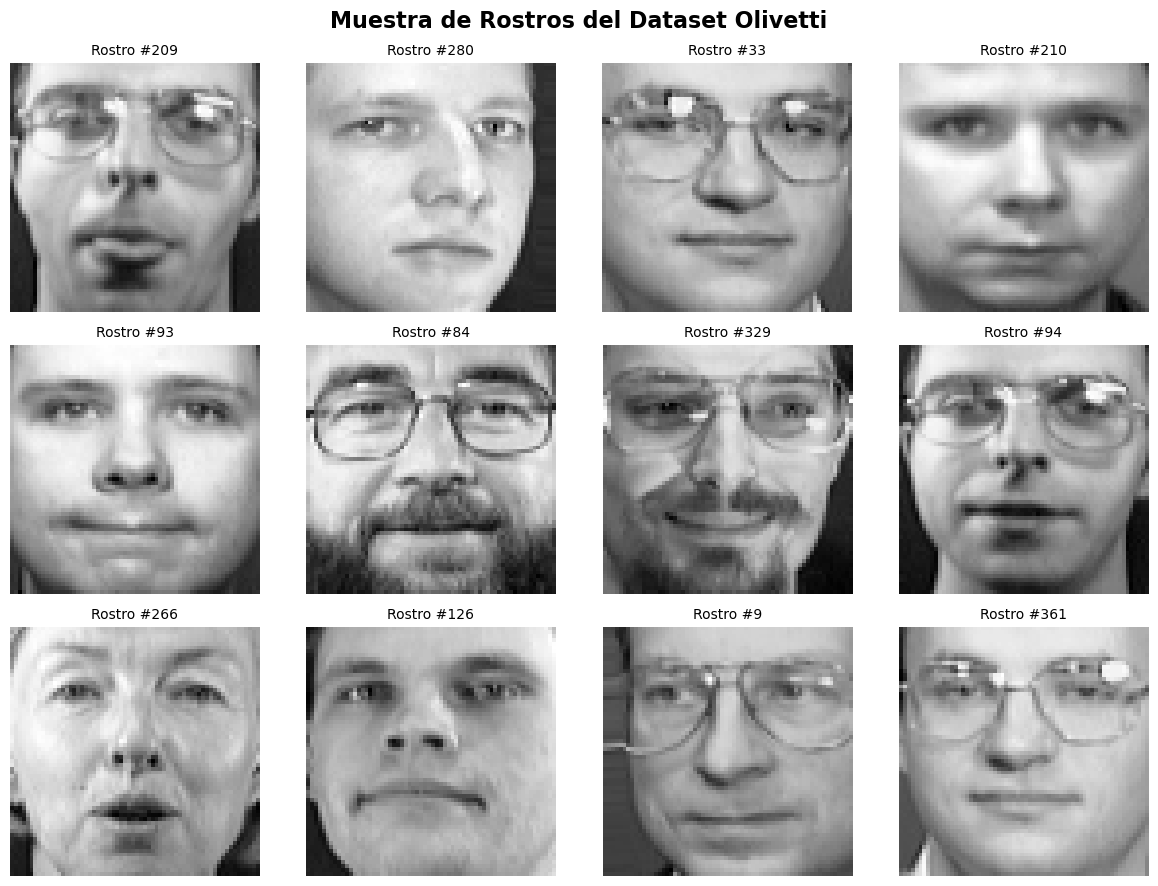

🔍 Observación importante:
   Cada imagen tiene 4096 píxeles
   Si 'aplanamos' cada imagen, obtenemos un vector de 4096 dimensiones
   ¡Trabajaremos en un espacio de 4096 dimensiones!


In [3]:
# PASO 2: Visualizando Algunos Rostros del Dataset
print("👥 Mostrando una muestra de rostros del dataset")

# Seleccionar 12 rostros aleatorios para mostrar
np.random.seed(42)
sample_indices = np.random.choice(n_samples, 12, replace=False)

fig, axes = plt.subplots(3, 4, figsize=(12, 9))
fig.suptitle('Muestra de Rostros del Dataset Olivetti', fontsize=16, fontweight='bold')

for i, idx in enumerate(sample_indices):
    row = i // 4
    col = i % 4
    axes[row, col].imshow(face_images[idx], cmap='gray')
    axes[row, col].set_title(f'Rostro #{idx}', fontsize=10)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

print(f"🔍 Observación importante:")
print(f"   Cada imagen tiene {face_images.shape[1] * face_images.shape[2]} píxeles")
print(f"   Si 'aplanamos' cada imagen, obtenemos un vector de {n_features} dimensiones")
print(f"   ¡Trabajaremos en un espacio de {n_features} dimensiones!")

## 🤔 PREGUNTA 1 - Comprensión Inicial

❓ **Discutan en pareja y respondan:**

1. **Dimensionalidad:** Tenemos 400 rostros, cada uno con 4096 píxeles. Si queremos encontrar patrones comunes entre todos los rostros, ¿cuál sería el problema de trabajar directamente con vectores de 4096 dimensiones?

2. **Intuición Geométrica:** Imaginen que cada rostro es un punto en un espacio de 4096 dimensiones. ¿Qué esperarían encontrar si calculan los vectores propios de este conjunto de puntos?

3. **Predicción:** Antes de continuar, ¿qué creen que representará visualmente un "vector propio" en este contexto?

---

**💡 Pista:** Piensen en cómo los valores propios nos dicen qué direcciones son más importantes para describir la variación en los datos.

📊 PASO 3: Calculando el rostro promedio
✅ Rostro promedio calculado
   📏 Forma del vector promedio: (4096,)
   🎯 Los datos han sido centrados (media restada)


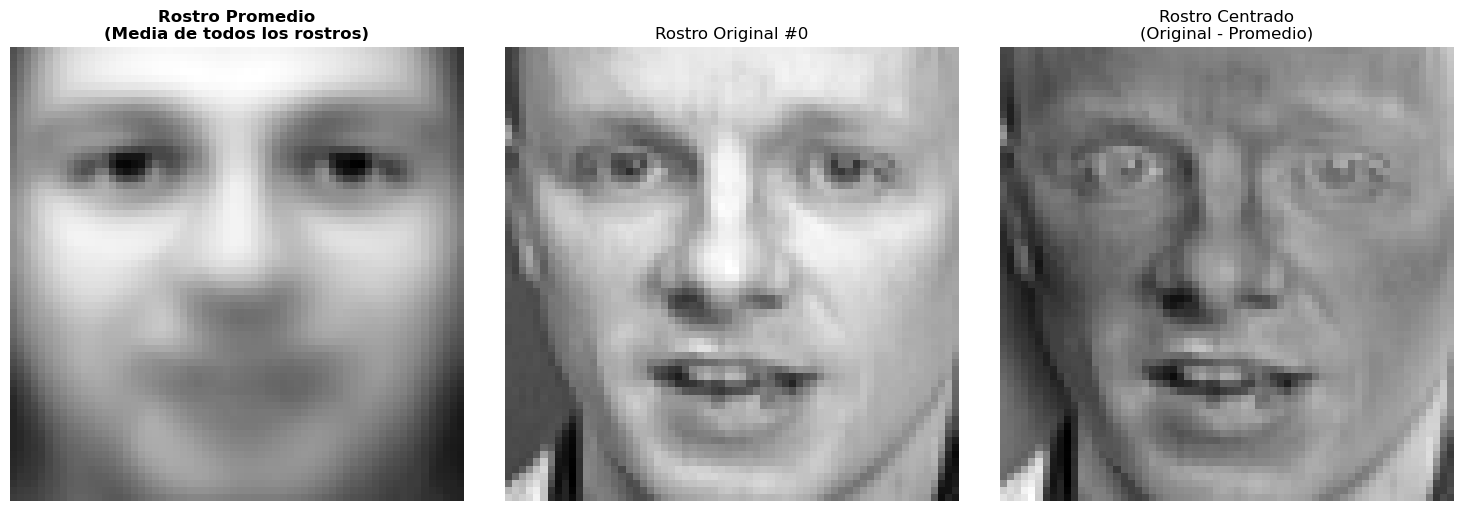


🔍 Interpretación:
   • El rostro promedio representa las características faciales 'típicas'
   • Los rostros centrados muestran las DIFERENCIAS respecto al promedio
   • ¡Es en estas diferencias donde encontraremos los patrones principales!


In [4]:
# PASO 3: Calculando el Rostro Promedio
print("📊 PASO 3: Calculando el rostro promedio")
print("=" * 60)

# Calcular el rostro promedio
mean_face = np.mean(faces, axis=0)
mean_face_image = mean_face.reshape((64, 64))

# Centrar los datos (restar la media)
faces_centered = faces - mean_face

print(f"✅ Rostro promedio calculado")
print(f"   📏 Forma del vector promedio: {mean_face.shape}")
print(f"   🎯 Los datos han sido centrados (media restada)")

# Visualizar el rostro promedio
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Rostro promedio
axes[0].imshow(mean_face_image, cmap='gray')
axes[0].set_title('Rostro Promedio\n(Media de todos los rostros)', fontsize=12, fontweight='bold')
axes[0].axis('off')

# Ejemplo de rostro original
example_idx = 0
axes[1].imshow(face_images[example_idx], cmap='gray')
axes[1].set_title(f'Rostro Original #{example_idx}', fontsize=12)
axes[1].axis('off')

# Rostro centrado (diferencia con la media)
centered_face = faces_centered[example_idx].reshape((64, 64))
axes[2].imshow(centered_face, cmap='gray')
axes[2].set_title('Rostro Centrado\n(Original - Promedio)', fontsize=12)
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"\n🔍 Interpretación:")
print(f"   • El rostro promedio representa las características faciales 'típicas'")
print(f"   • Los rostros centrados muestran las DIFERENCIAS respecto al promedio")  
print(f"   • ¡Es en estas diferencias donde encontraremos los patrones principales!")

In [5]:
# PASO 4: Calculando Eigenfaces (Vectores Propios)
print("🧮 PASO 4: Calculando los Eigenfaces")
print("=" * 60)

# Usar PCA para encontrar los componentes principales (vectores propios)
# PCA internamente calcula los vectores propios de la matriz de covarianza
n_components = 50  # Calcularemos los 50 eigenfaces más importantes

pca = PCA(n_components=n_components, random_state=42)
pca.fit(faces_centered)

# Los vectores propios están en pca.components_
eigenfaces = pca.components_  # Forma: (50, 4096)
eigenvalues = pca.explained_variance_  # Los valores propios

print(f"✅ Eigenfaces calculados exitosamente:")
print(f"   📊 Número de eigenfaces: {eigenfaces.shape[0]}")
print(f"   📏 Dimensión de cada eigenface: {eigenfaces.shape[1]}")
print(f"   🎯 Varianza total explicada: {pca.explained_variance_ratio_.sum():.1%}")

# Información sobre los valores propios
print(f"\n📈 Análisis de Valores Propios:")
print(f"   🥇 Mayor valor propio: {eigenvalues[0]:.2f}")
print(f"   🥈 Segundo mayor: {eigenvalues[1]:.2f}")
print(f"   🥉 Tercer mayor: {eigenvalues[2]:.2f}")
print(f"   📉 Menor valor propio: {eigenvalues[-1]:.2f}")

# Reshapear eigenfaces para visualización
eigenfaces_images = eigenfaces.reshape((n_components, 64, 64))

print(f"\n💡 Recuerden: Cada eigenface es un VECTOR PROPIO de la matriz de covarianza")
print(f"   Su valor propio asociado indica qué tan importante es para describir variaciones")

🧮 PASO 4: Calculando los Eigenfaces
✅ Eigenfaces calculados exitosamente:
   📊 Número de eigenfaces: 50
   📏 Dimensión de cada eigenface: 4096
   🎯 Varianza total explicada: 87.4%

📈 Análisis de Valores Propios:
   🥇 Mayor valor propio: 18.84
   🥈 Segundo mayor: 11.07
   🥉 Tercer mayor: 6.30
   📉 Menor valor propio: 0.16

💡 Recuerden: Cada eigenface es un VECTOR PROPIO de la matriz de covarianza
   Su valor propio asociado indica qué tan importante es para describir variaciones


👁️ PASO 5: Visualizando los primeros eigenfaces


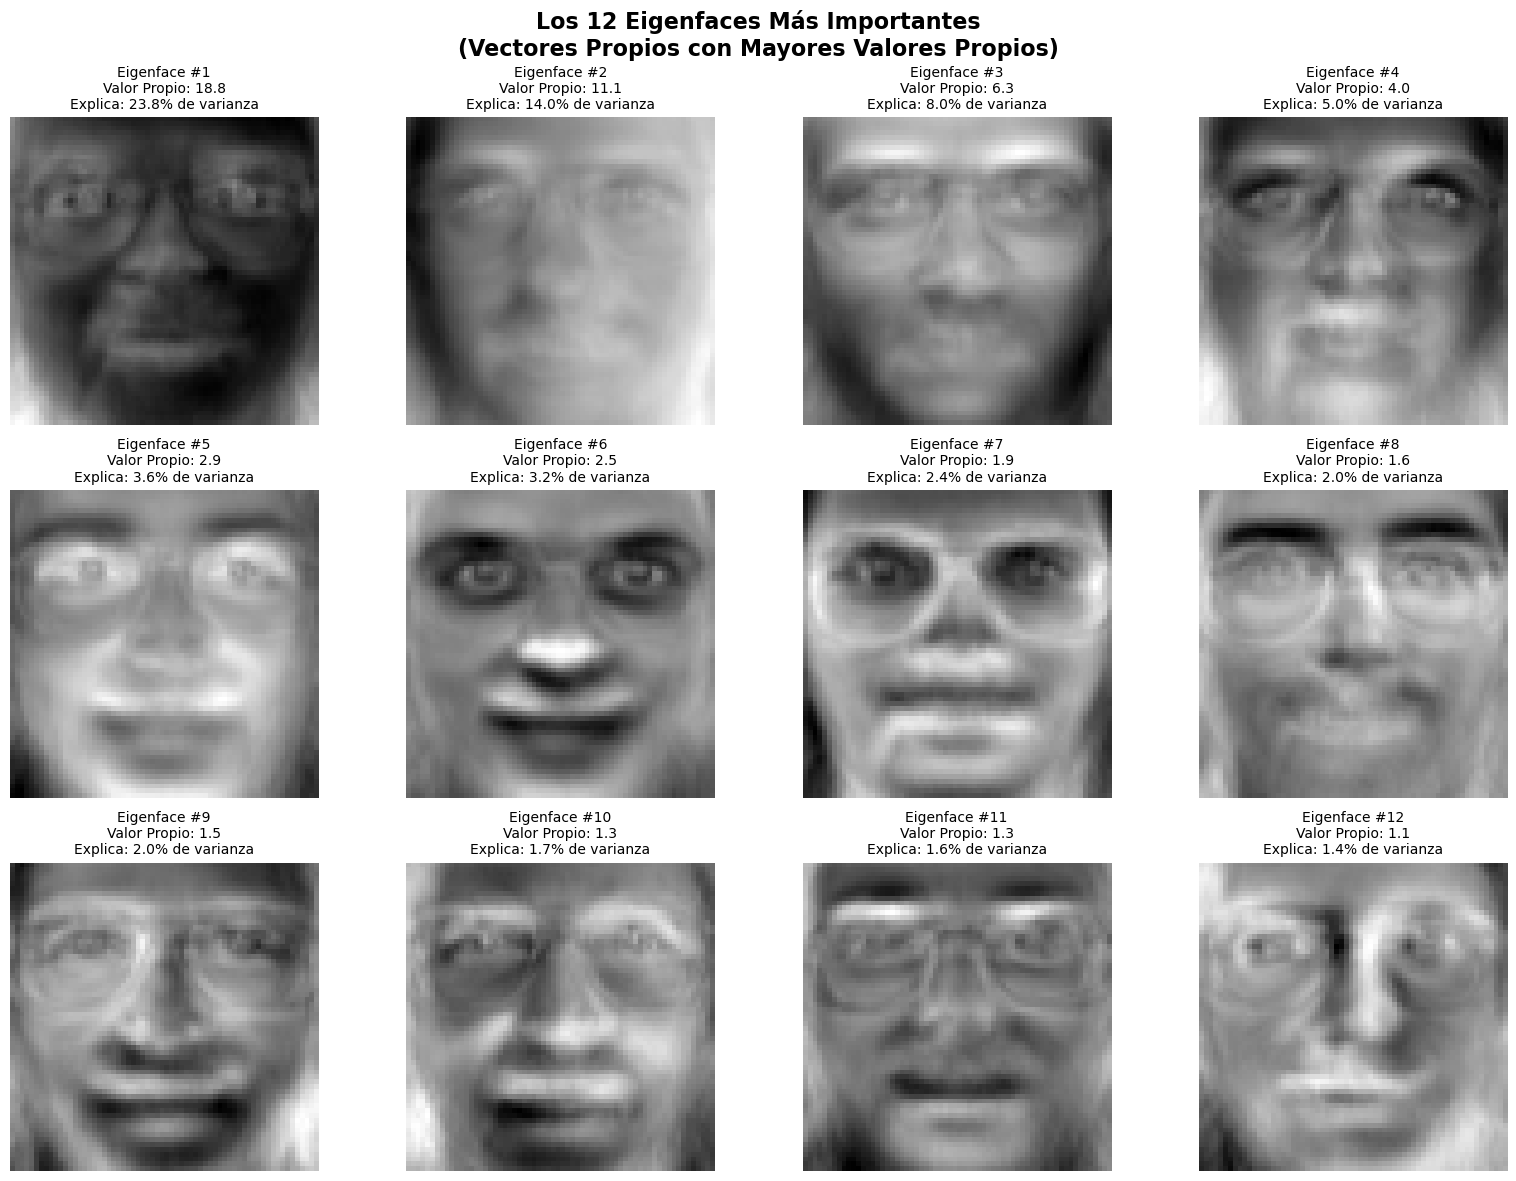

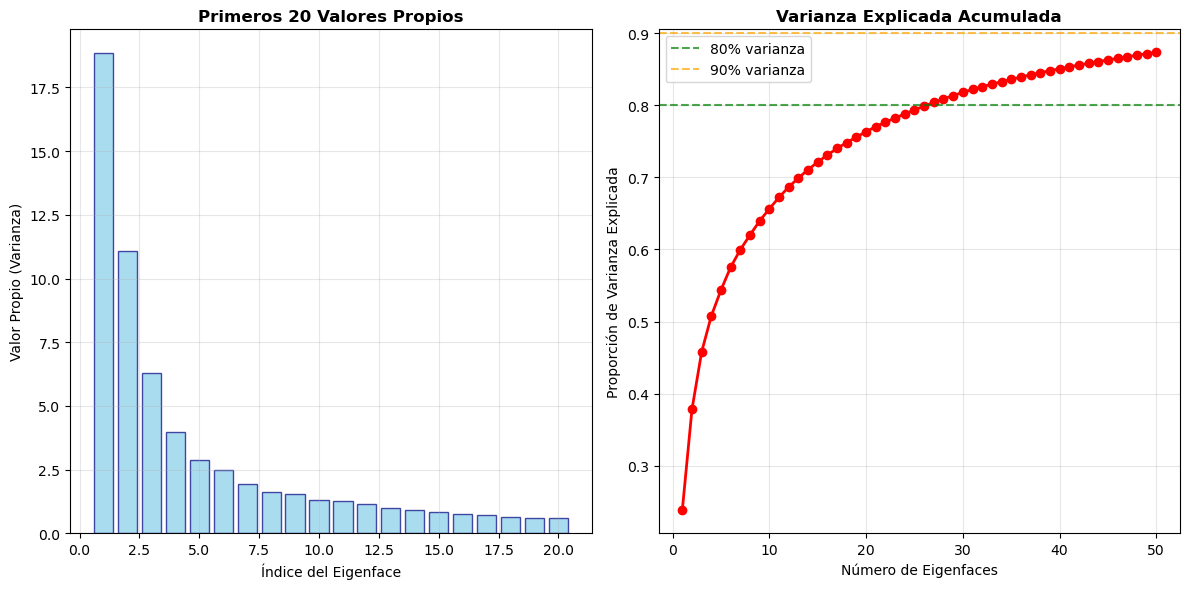

🔍 Observaciones importantes:
   • Los eigenfaces parecen 'rostros fantasmales' con patrones específicos
   • Los primeros eigenfaces capturan las variaciones MÁS importantes
   • Con solo 27 eigenfaces explicamos 80% de la varianza
   • Con 1 eigenfaces explicamos 90% de la varianza


In [6]:
# PASO 5: Visualizando los Eigenfaces Más Importantes
print("👁️ PASO 5: Visualizando los primeros eigenfaces")
print("=" * 60)

# Mostrar los 12 eigenfaces más importantes
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
fig.suptitle('Los 12 Eigenfaces Más Importantes\n(Vectores Propios con Mayores Valores Propios)', 
             fontsize=16, fontweight='bold')

for i in range(12):
    row = i // 4
    col = i % 4
    
    # Mostrar el eigenface
    axes[row, col].imshow(eigenfaces_images[i], cmap='gray')
    axes[row, col].set_title(f'Eigenface #{i+1}\nValor Propio: {eigenvalues[i]:.1f}\n'
                            f'Explica: {pca.explained_variance_ratio_[i]:.1%} de varianza', 
                            fontsize=10)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Mostrar gráfico de valores propios
plt.figure(figsize=(12, 6))

# Gráfico de barras de los primeros 20 valores propios
plt.subplot(1, 2, 1)
plt.bar(range(1, 21), eigenvalues[:20], alpha=0.7, color='skyblue', edgecolor='navy')
plt.title('Primeros 20 Valores Propios', fontweight='bold')
plt.xlabel('Índice del Eigenface')
plt.ylabel('Valor Propio (Varianza)')
plt.grid(True, alpha=0.3)

# Gráfico de varianza explicada acumulada
plt.subplot(1, 2, 2)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, n_components+1), cumulative_variance, 'o-', color='red', linewidth=2)
plt.title('Varianza Explicada Acumulada', fontweight='bold')
plt.xlabel('Número de Eigenfaces')
plt.ylabel('Proporción de Varianza Explicada')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.8, color='green', linestyle='--', alpha=0.7, label='80% varianza')
plt.axhline(y=0.9, color='orange', linestyle='--', alpha=0.7, label='90% varianza')
plt.legend()

plt.tight_layout()
plt.show()

print(f"🔍 Observaciones importantes:")
print(f"   • Los eigenfaces parecen 'rostros fantasmales' con patrones específicos")
print(f"   • Los primeros eigenfaces capturan las variaciones MÁS importantes")
print(f"   • Con solo {np.argmax(cumulative_variance >= 0.8) + 1} eigenfaces explicamos 80% de la varianza")
print(f"   • Con {np.argmax(cumulative_variance >= 0.9) + 1} eigenfaces explicamos 90% de la varianza")

## 🤔 PREGUNTA 2 - Interpretación de Eigenfaces

❓ **Analicen los eigenfaces mostrados arriba y respondan:**

1. **Patrones Visuales:** ¿Qué patrones pueden identificar en los primeros eigenfaces? (Por ejemplo: sombras, contornos, iluminación, etc.)

2. **Valores Propios:** Observen cómo disminuyen los valores propios. ¿Qué significa matemáticamente que el primer eigenface tenga un valor propio mucho mayor que el último?

3. **Varianza Explicada:** Según el gráfico, ¿cuántos eigenfaces necesitamos para capturar al menos 80% de la información? ¿Y para 90%?

4. **Conexión Teórica:** En términos de álgebra lineal, ¿por qué los eigenfaces con valores propios más grandes son más importantes para representar rostros?

---

**💡 Reflexión:** Los eigenfaces no son rostros reales, sino **direcciones de máxima variación** en el espacio de rostros.

🎭 PASO 6: Descomponiendo un rostro en eigenfaces
🎯 Rostro seleccionado: #42
✅ Coeficientes calculados:
   📊 Número de coeficientes: 50
   📈 Primeros 5 coeficientes: [ 0.3593701  -9.94179809  0.43776359  3.33748083  1.7756632 ]


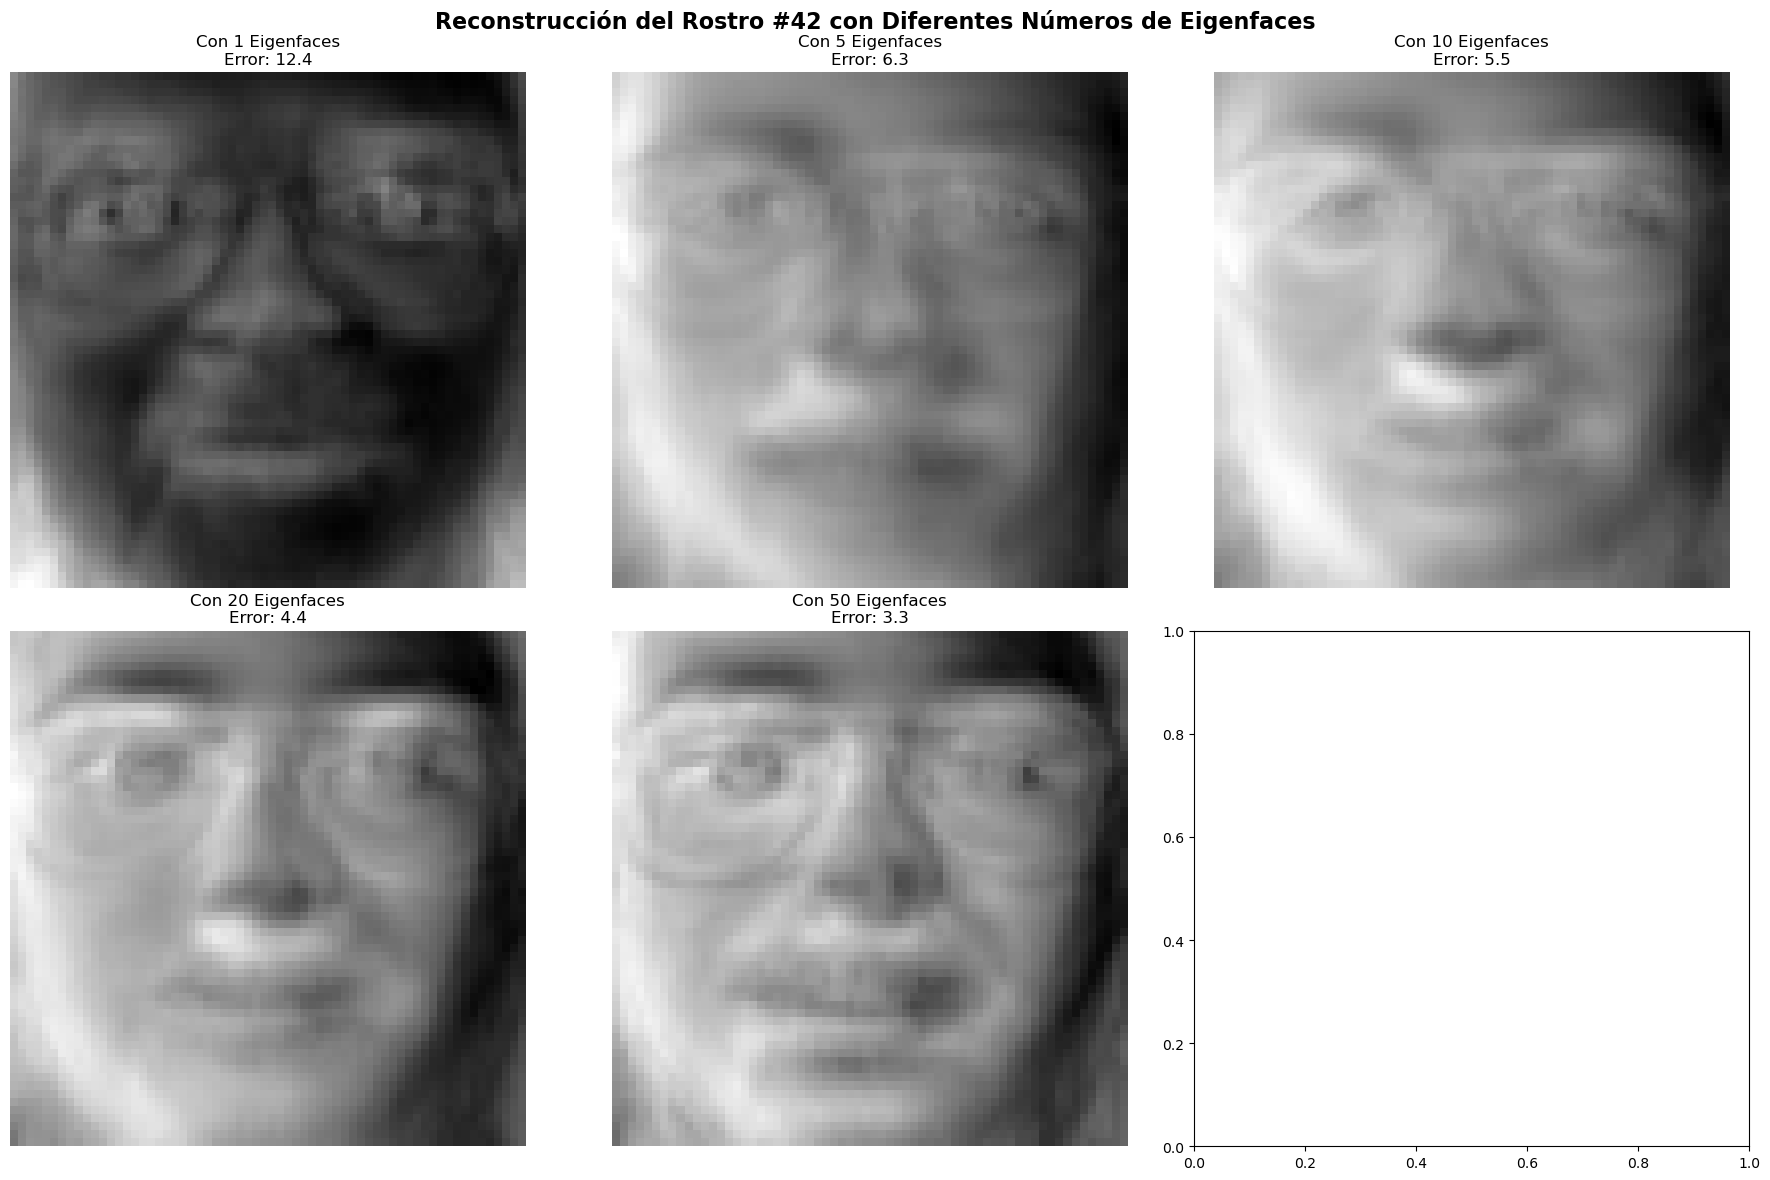

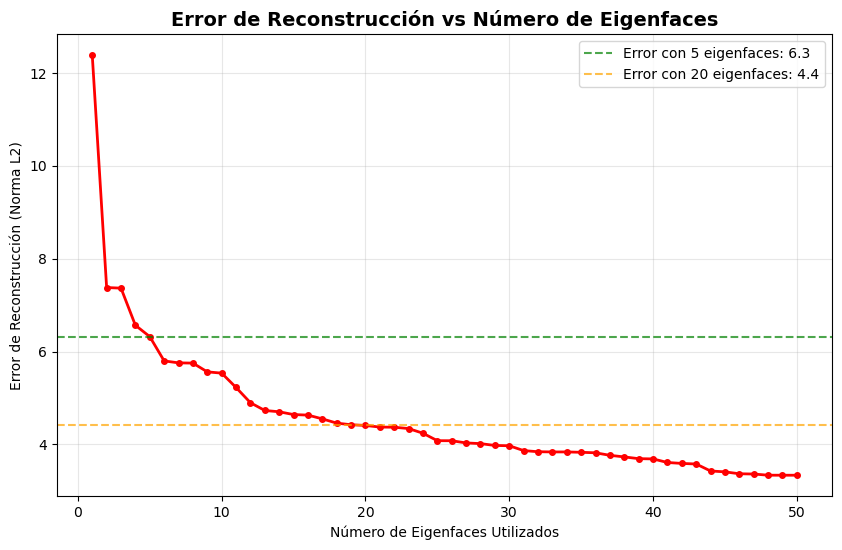


🔍 Interpretación matemática:
   • Cada rostro = Rostro_promedio + Σ(coeficiente_i × eigenface_i)
   • Los coeficientes son las 'coordenadas' del rostro en el espacio de eigenfaces
   • Más eigenfaces = mejor reconstrucción = menor error
   • Error con 5 eigenfaces: 6.3
   • Error con 20 eigenfaces: 4.4


In [7]:
# PASO 6: Representando un Rostro como Combinación Lineal de Eigenfaces
print("🎭 PASO 6: Descomponiendo un rostro en eigenfaces")
print("=" * 60)

# Seleccionar un rostro específico para analizar
target_face_idx = 42
target_face = faces_centered[target_face_idx]
target_face_image = target_face.reshape((64, 64))

print(f"🎯 Rostro seleccionado: #{target_face_idx}")

# Proyectar el rostro en el espacio de eigenfaces
# Esto nos da los coeficientes (pesos) para cada eigenface
coefficients = pca.transform([target_face])[0]

print(f"✅ Coeficientes calculados:")
print(f"   📊 Número de coeficientes: {len(coefficients)}")
print(f"   📈 Primeros 5 coeficientes: {coefficients[:5]}")

# Reconstruir el rostro usando diferentes números de eigenfaces
reconstruction_levels = [1, 5, 10, 20, 50]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(f'Reconstrucción del Rostro #{target_face_idx} con Diferentes Números de Eigenfaces', 
             fontsize=16, fontweight='bold')

# Mostrar rostro original
axes[0, 0].imshow(target_face_image, cmap='gray')
axes[0, 0].set_title('Rostro Original\n(Centrado)', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

# Reconstrucciones con diferentes números de eigenfaces
for i, n_comp in enumerate(reconstruction_levels):
    if i < 5:  # Solo tenemos 5 espacios más en la figura
        row = i // 3 if i < 3 else 1
        col = (i % 3) if i < 3 else ((i-3) % 3)
        
        # Reconstruir usando solo los primeros n_comp eigenfaces
        reconstruction = np.dot(coefficients[:n_comp], eigenfaces[:n_comp])
        reconstruction_image = reconstruction.reshape((64, 64))
        
        axes[row, col].imshow(reconstruction_image, cmap='gray')
        axes[row, col].set_title(f'Con {n_comp} Eigenfaces\n'
                                f'Error: {np.linalg.norm(target_face - reconstruction):.1f}', 
                                fontsize=12)
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Análisis cuantitativo del error de reconstrucción
errors = []
components_range = range(1, 51)

for n_comp in components_range:
    reconstruction = np.dot(coefficients[:n_comp], eigenfaces[:n_comp])
    error = np.linalg.norm(target_face - reconstruction)
    errors.append(error)

# Gráfico del error de reconstrucción
plt.figure(figsize=(10, 6))
plt.plot(components_range, errors, 'o-', linewidth=2, markersize=4, color='red')
plt.title('Error de Reconstrucción vs Número de Eigenfaces', fontweight='bold', fontsize=14)
plt.xlabel('Número de Eigenfaces Utilizados')
plt.ylabel('Error de Reconstrucción (Norma L2)')
plt.grid(True, alpha=0.3)
plt.axhline(y=errors[4], color='green', linestyle='--', alpha=0.7, 
            label=f'Error con 5 eigenfaces: {errors[4]:.1f}')
plt.axhline(y=errors[19], color='orange', linestyle='--', alpha=0.7, 
            label=f'Error con 20 eigenfaces: {errors[19]:.1f}')
plt.legend()
plt.show()

print(f"\n🔍 Interpretación matemática:")
print(f"   • Cada rostro = Rostro_promedio + Σ(coeficiente_i × eigenface_i)")
print(f"   • Los coeficientes son las 'coordenadas' del rostro en el espacio de eigenfaces")
print(f"   • Más eigenfaces = mejor reconstrucción = menor error")
print(f"   • Error con 5 eigenfaces: {errors[4]:.1f}")
print(f"   • Error con 20 eigenfaces: {errors[19]:.1f}")

🧪 PASO 7: Experimento - Modificando coeficientes de eigenfaces


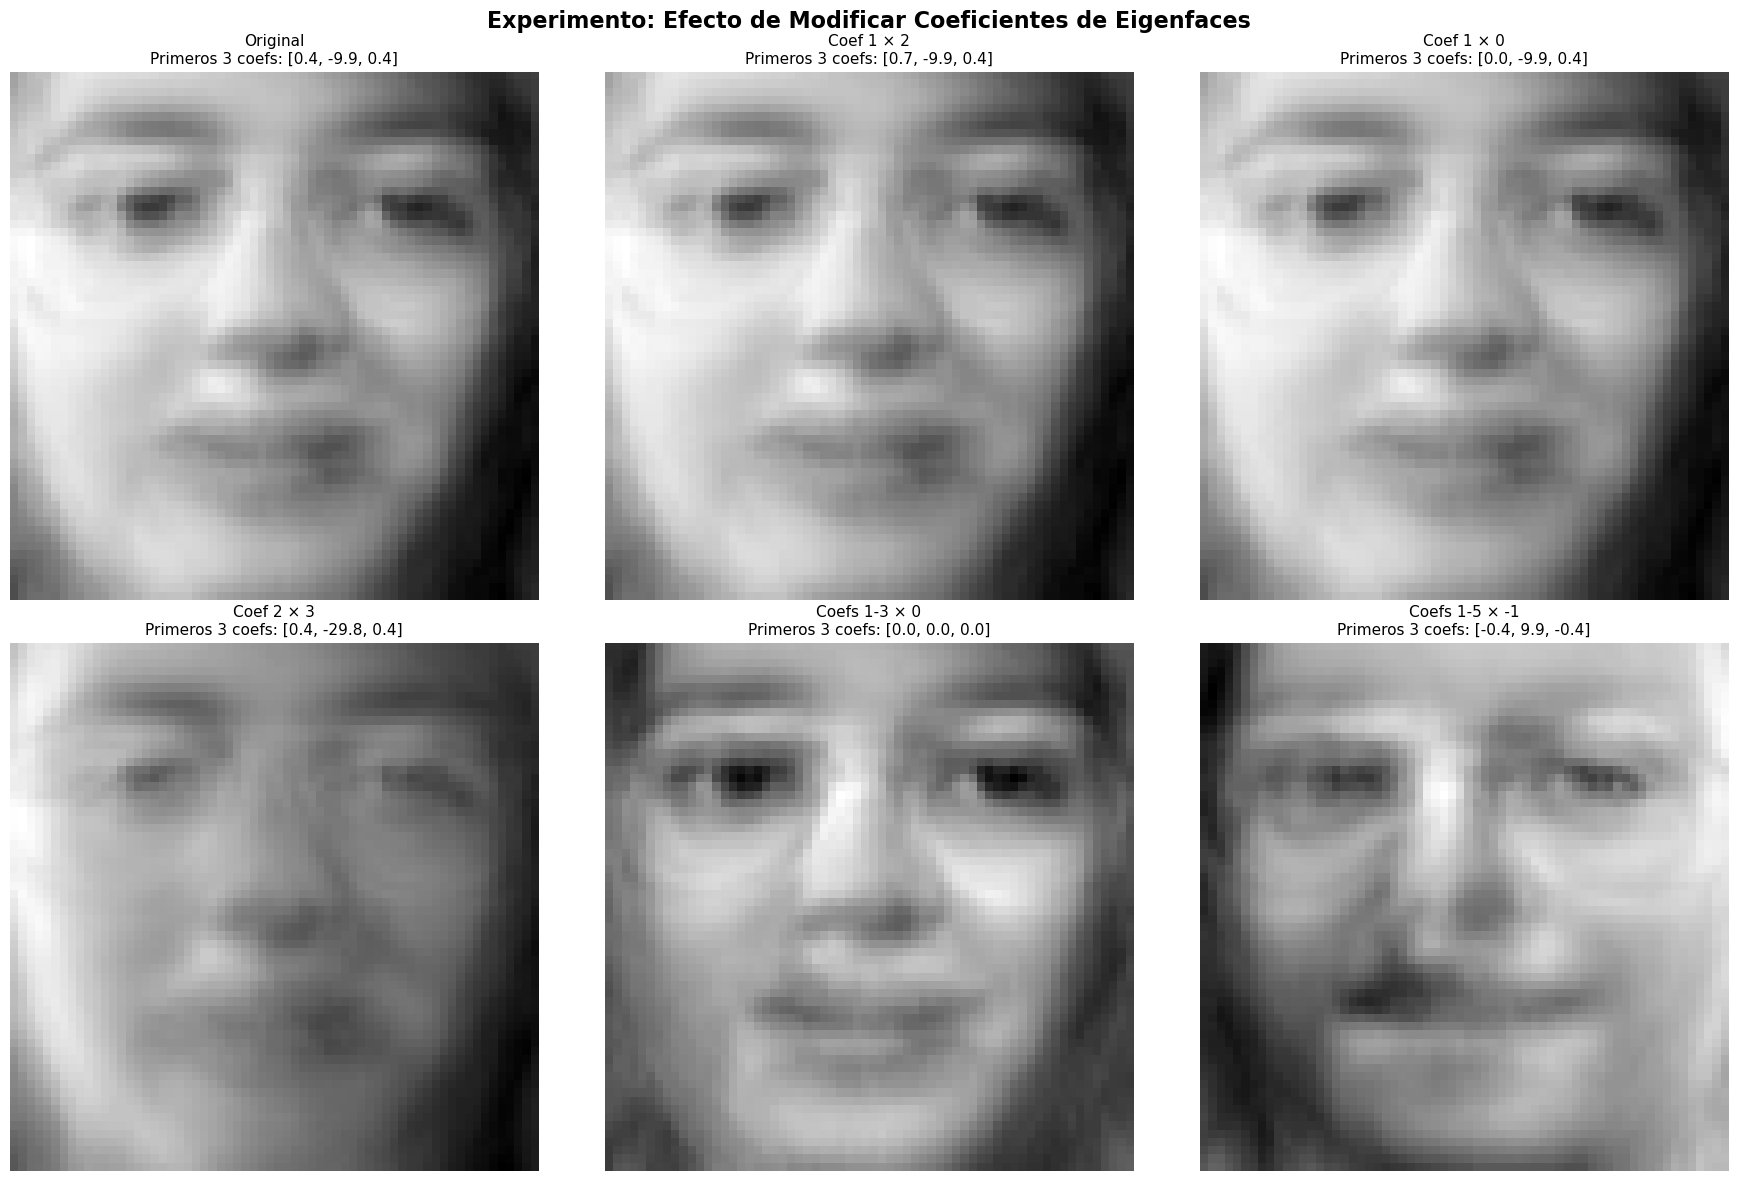

📊 Análisis de coeficientes del rostro #42:
   Coeficientes más importantes (por magnitud):
   #1: Eigenface 2 con coeficiente -9.94 (|9.94|)
   #2: Eigenface 4 con coeficiente 3.34 (|3.34|)
   #3: Eigenface 6 con coeficiente -2.52 (|2.52|)
   #4: Eigenface 11 con coeficiente 1.82 (|1.82|)
   #5: Eigenface 12 con coeficiente -1.82 (|1.82|)
   #6: Eigenface 5 con coeficiente 1.78 (|1.78|)
   #7: Eigenface 9 con coeficiente 1.46 (|1.46|)
   #8: Eigenface 13 con coeficiente 1.27 (|1.27|)


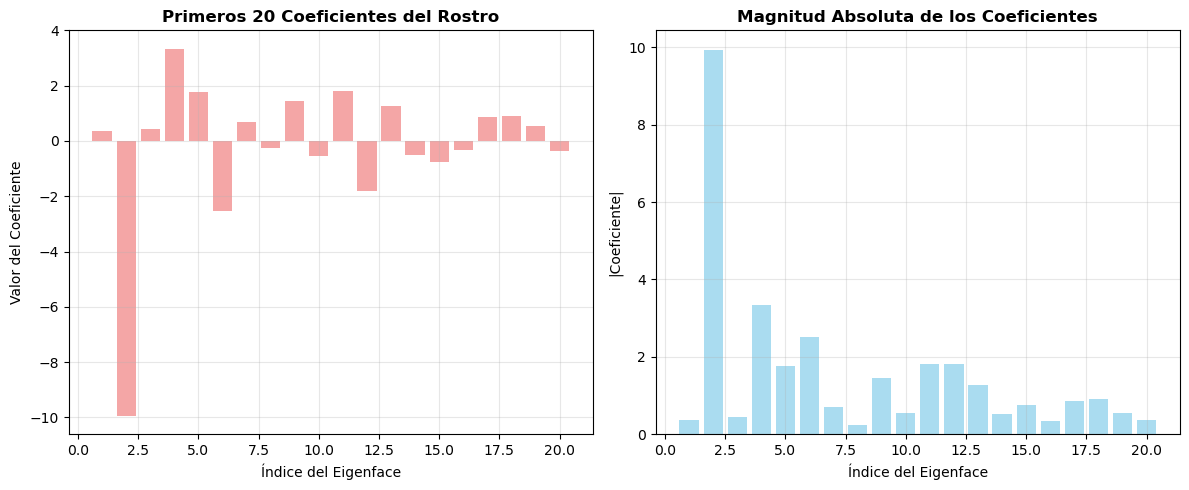


💡 Observaciones clave:
   • Cambiar coeficientes de eigenfaces importantes causa cambios dramáticos
   • Los primeros eigenfaces tienen el mayor impacto visual
   • Los coeficientes pueden ser positivos o negativos
   • Anular coeficientes = eliminar esas variaciones del rostro


In [8]:
# PASO 7: Experimento Interactivo - Modificando Coeficientes
print("🧪 PASO 7: Experimento - Modificando coeficientes de eigenfaces")
print("=" * 60)

# Función para reconstruir rostro con coeficientes modificados
def reconstruct_face(coefficients, eigenfaces, mean_face):
    """Reconstruye un rostro usando coeficientes y eigenfaces"""
    reconstruction = mean_face + np.dot(coefficients, eigenfaces)
    return reconstruction.reshape((64, 64))

# Usar el mismo rostro del paso anterior
base_coefficients = coefficients.copy()

# Experimentos: modificar diferentes coeficientes
experiments = [
    ("Original", base_coefficients.copy()),
    ("Coef 1 × 2", base_coefficients.copy()),
    ("Coef 1 × 0", base_coefficients.copy()),
    ("Coef 2 × 3", base_coefficients.copy()),
    ("Coefs 1-3 × 0", base_coefficients.copy()),
    ("Coefs 1-5 × -1", base_coefficients.copy())
]

# Aplicar modificaciones
experiments[1][1][0] *= 2    # Duplicar primer coeficiente
experiments[2][1][0] = 0     # Anular primer coeficiente
experiments[3][1][1] *= 3    # Triplicar segundo coeficiente
experiments[4][1][:3] = 0    # Anular primeros 3 coeficientes
experiments[5][1][:5] *= -1  # Invertir primeros 5 coeficientes

# Visualizar experimentos
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Experimento: Efecto de Modificar Coeficientes de Eigenfaces', 
             fontsize=16, fontweight='bold')

for i, (name, coefs) in enumerate(experiments):
    row = i // 3
    col = i % 3
    
    # Reconstruir con coeficientes modificados
    reconstruction = reconstruct_face(coefs[:20], eigenfaces[:20], mean_face)
    
    axes[row, col].imshow(reconstruction, cmap='gray')
    axes[row, col].set_title(f'{name}\nPrimeros 3 coefs: [{coefs[0]:.1f}, {coefs[1]:.1f}, {coefs[2]:.1f}]', 
                            fontsize=11)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Análisis de la importancia de cada coeficiente
print(f"📊 Análisis de coeficientes del rostro #{target_face_idx}:")
print(f"   Coeficientes más importantes (por magnitud):")

# Ordenar coeficientes por magnitud absoluta
coef_importance = [(i, abs(coef)) for i, coef in enumerate(base_coefficients)]
coef_importance.sort(key=lambda x: x[1], reverse=True)

for i, (idx, magnitude) in enumerate(coef_importance[:8]):
    print(f"   #{i+1}: Eigenface {idx+1} con coeficiente {base_coefficients[idx]:.2f} (|{magnitude:.2f}|)")

# Gráfico de coeficientes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, 21), base_coefficients[:20], alpha=0.7, color='lightcoral')
plt.title('Primeros 20 Coeficientes del Rostro', fontweight='bold')
plt.xlabel('Índice del Eigenface')
plt.ylabel('Valor del Coeficiente')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(range(1, 21), [abs(c) for c in base_coefficients[:20]], alpha=0.7, color='skyblue')
plt.title('Magnitud Absoluta de los Coeficientes', fontweight='bold')
plt.xlabel('Índice del Eigenface')
plt.ylabel('|Coeficiente|')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 Observaciones clave:")
print(f"   • Cambiar coeficientes de eigenfaces importantes causa cambios dramáticos")
print(f"   • Los primeros eigenfaces tienen el mayor impacto visual")
print(f"   • Los coeficientes pueden ser positivos o negativos")
print(f"   • Anular coeficientes = eliminar esas variaciones del rostro")

## 🤔 PREGUNTA 3 - Combinaciones Lineales y Coeficientes

❓ **Basándose en los experimentos anteriores, respondan:**

1. **Impacto de Coeficientes:** ¿Qué pasa cuando duplicamos el coeficiente del primer eigenface? ¿Y cuando lo ponemos en cero? Expliquen la diferencia en términos de la ecuación $\text{Rostro} = \text{Promedio} + \sum_{i=1}^{n} c_i \cdot \text{eigenface}_i$

2. **Signos de Coeficientes:** Algunos coeficientes son positivos y otros negativos. ¿Qué significa geométricamente que un coeficiente sea negativo?

3. **Orden de Importancia:** ¿Por qué modificar los coeficientes de los primeros eigenfaces produce cambios más notorios que modificar los últimos?

4. **Aplicación Práctica:** Si queremos comprimir imágenes de rostros, ¿cuántos eigenfaces recomendarían usar y por qué?

---

**🎯 Conexión con Álgebra Lineal:** Los coeficientes son las coordenadas del rostro en la base formada por los eigenfaces.

🔍 PASO 8: Aplicación - Reconocimiento facial usando eigenfaces
👥 Trabajando con 5 personas (10 imágenes cada una)
🎯 Usando 20 eigenfaces para representar cada rostro

🧪 Experimento de reconocimiento:
   🎭 Rostro de prueba: Persona 2, Imagen 3 (índice 23)


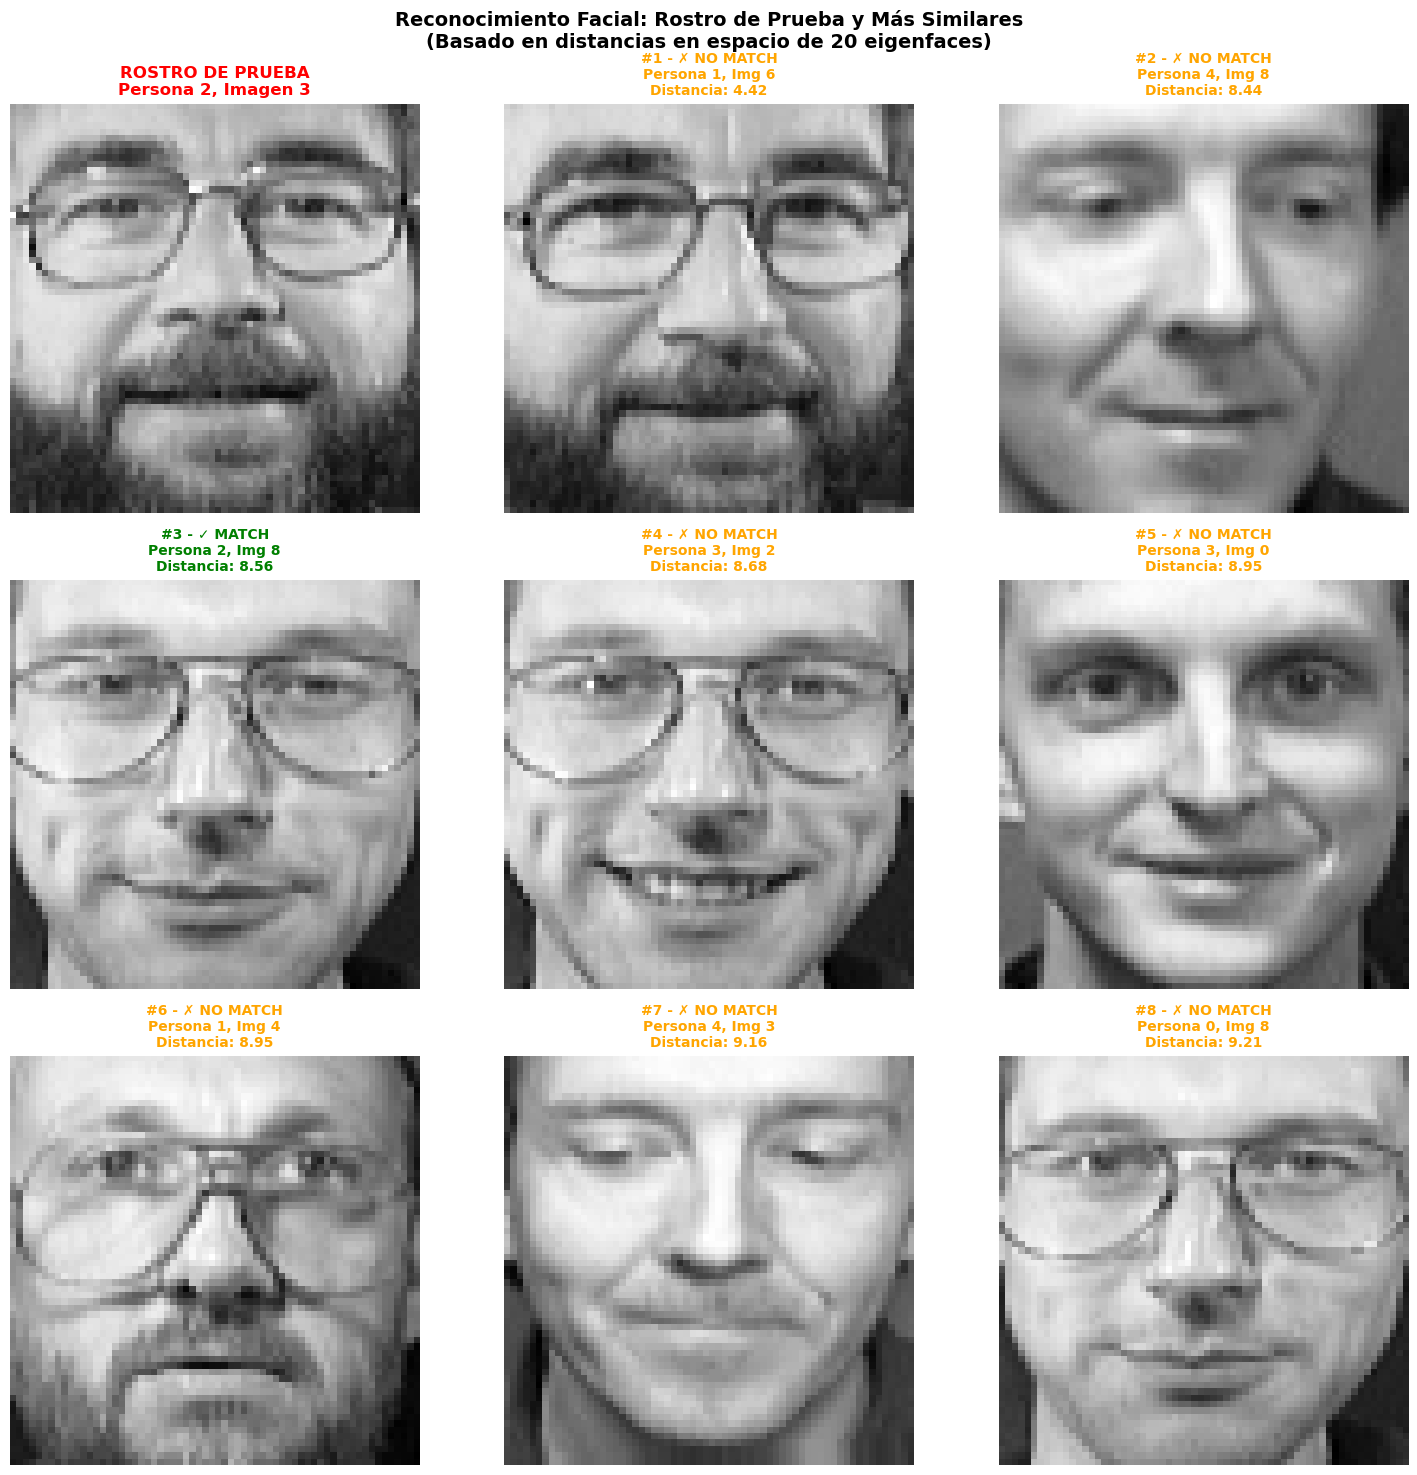


📊 Análisis de distancias:
   🎯 Distancias a imágenes de la MISMA persona:
      Promedio: 11.09
      Mínima: 8.56
      Máxima: 13.35
   👥 Distancias a imágenes de DIFERENTES personas:
      Promedio: 11.18
      Mínima: 4.42
      Máxima: 15.93

🎯 Precisión en top-5: 1/5 = 20%


In [11]:
# PASO 8: Reconocimiento Facial Básico
print("🔍 PASO 8: Aplicación - Reconocimiento facial usando eigenfaces")
print("=" * 60)

# Seleccionar algunas personas del dataset (cada persona tiene ~10 imágenes)
# El dataset Olivetti tiene 40 personas, 10 imágenes cada una
n_people = 5
n_images_per_person = 10

# Seleccionar las primeras 5 personas
selected_faces = faces_centered[:n_people * n_images_per_person]
selected_images = face_images[:n_people * n_images_per_person]

# Proyectar todas las caras seleccionadas al espacio de eigenfaces
n_components_recognition = 20  # Usar 20 eigenfaces para reconocimiento
all_coefficients = pca.transform(selected_faces)[:, :n_components_recognition]

print(f"👥 Trabajando con {n_people} personas ({n_images_per_person} imágenes cada una)")
print(f"🎯 Usando {n_components_recognition} eigenfaces para representar cada rostro")

# Función de distancia entre rostros en el espacio de eigenfaces
def face_distance(face1_coeffs, face2_coeffs):
    """Calcula la distancia euclidiana entre dos rostros en el espacio de eigenfaces"""
    return np.linalg.norm(face1_coeffs - face2_coeffs)

# Experimento: Tomar una imagen de una persona y encontrar las más similares
test_person = 2  # Persona #2
test_image = 3   # Imagen #3 de esa persona
test_idx = test_person * n_images_per_person + test_image

test_coefficients = all_coefficients[test_idx]

print(f"\n🧪 Experimento de reconocimiento:")
print(f"   🎭 Rostro de prueba: Persona {test_person}, Imagen {test_image} (índice {test_idx})")

# Calcular distancias a todos los otros rostros
distances = []
for i, coeffs in enumerate(all_coefficients):
    if i != test_idx:  # No comparar consigo mismo
        dist = face_distance(test_coefficients, coeffs)
        person_id = i // n_images_per_person
        image_id = i % n_images_per_person
        distances.append((i, person_id, image_id, dist))

# Ordenar por distancia
distances.sort(key=lambda x: x[3])

# Mostrar el rostro de prueba y los 8 más similares
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle(f'Reconocimiento Facial: Rostro de Prueba y Más Similares\n'
             f'(Basado en distancias en espacio de {n_components_recognition} eigenfaces)', 
             fontsize=14, fontweight='bold')

# Rostro de prueba
axes[0, 0].imshow(selected_images[test_idx], cmap='gray')
axes[0, 0].set_title(f'ROSTRO DE PRUEBA\nPersona {test_person}, Imagen {test_image}', 
                    fontsize=12, fontweight='bold', color='red')
axes[0, 0].axis('off')

# Los 8 rostros más similares
for i in range(8):
    # Calcular posición en la grilla (saltando la posición [0,0] que es el rostro de prueba)
    if i < 2:
        row, col = 0, i + 1
    elif i < 5:
        row, col = 1, i - 2
    else:
        row, col = 2, i - 5
    
    idx, person_id, image_id, dist = distances[i]
    
    axes[row, col].imshow(selected_images[idx], cmap='gray')
    
    # Colorear según si es la misma persona
    color = 'green' if person_id == test_person else 'orange'
    match_text = '✓ MATCH' if person_id == test_person else '✗ NO MATCH'
    
    axes[row, col].set_title(f'#{i+1} - {match_text}\nPersona {person_id}, Img {image_id}\n'
                            f'Distancia: {dist:.2f}', 
                            fontsize=10, color=color, fontweight='bold')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Estadísticas de reconocimiento
same_person_distances = [d[3] for d in distances if d[1] == test_person]
different_person_distances = [d[3] for d in distances if d[1] != test_person]

print(f"\n📊 Análisis de distancias:")
print(f"   🎯 Distancias a imágenes de la MISMA persona:")
print(f"      Promedio: {np.mean(same_person_distances):.2f}")
print(f"      Mínima: {np.min(same_person_distances):.2f}")
print(f"      Máxima: {np.max(same_person_distances):.2f}")

print(f"   👥 Distancias a imágenes de DIFERENTES personas:")
print(f"      Promedio: {np.mean(different_person_distances):.2f}")
print(f"      Mínima: {np.min(different_person_distances):.2f}")
print(f"      Máxima: {np.max(different_person_distances):.2f}")

# Verificar cuántos de los 5 más cercanos son de la misma persona
top_5_matches = sum(1 for d in distances[:5] if d[1] == test_person)
print(f"\n🎯 Precisión en top-5: {top_5_matches}/5 = {top_5_matches/5:.0%}")

📈 PASO 9: Análisis - Número óptimo de eigenfaces para reconocimiento
🧪 Probando reconocimiento con diferentes números de eigenfaces...
   Con  1 eigenfaces: 0.0% de precisión
   Con  2 eigenfaces: 0.0% de precisión
   Con  5 eigenfaces: 0.0% de precisión
   Con 10 eigenfaces: 25.0% de precisión
   Con 15 eigenfaces: 0.0% de precisión
   Con 20 eigenfaces: 25.0% de precisión
   Con 30 eigenfaces: 25.0% de precisión
   Con 40 eigenfaces: 25.0% de precisión
   Con 50 eigenfaces: 25.0% de precisión


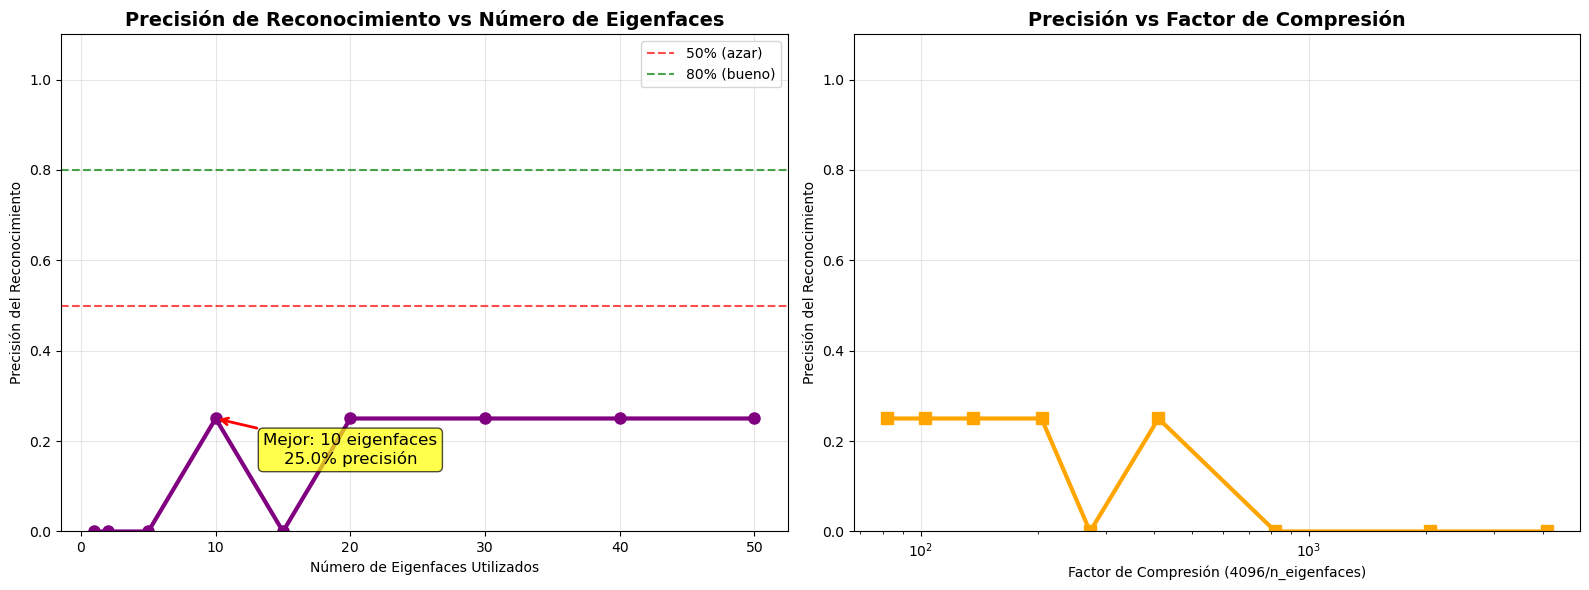


📊 Análisis de eficiencia:
   📏 Dimensión original: 4096 píxeles
   🎯 Con 10 eigenfaces: 410x compresión, 25.0% precisión
   🎯 Con 20 eigenfaces: 205x compresión, 25.0% precisión


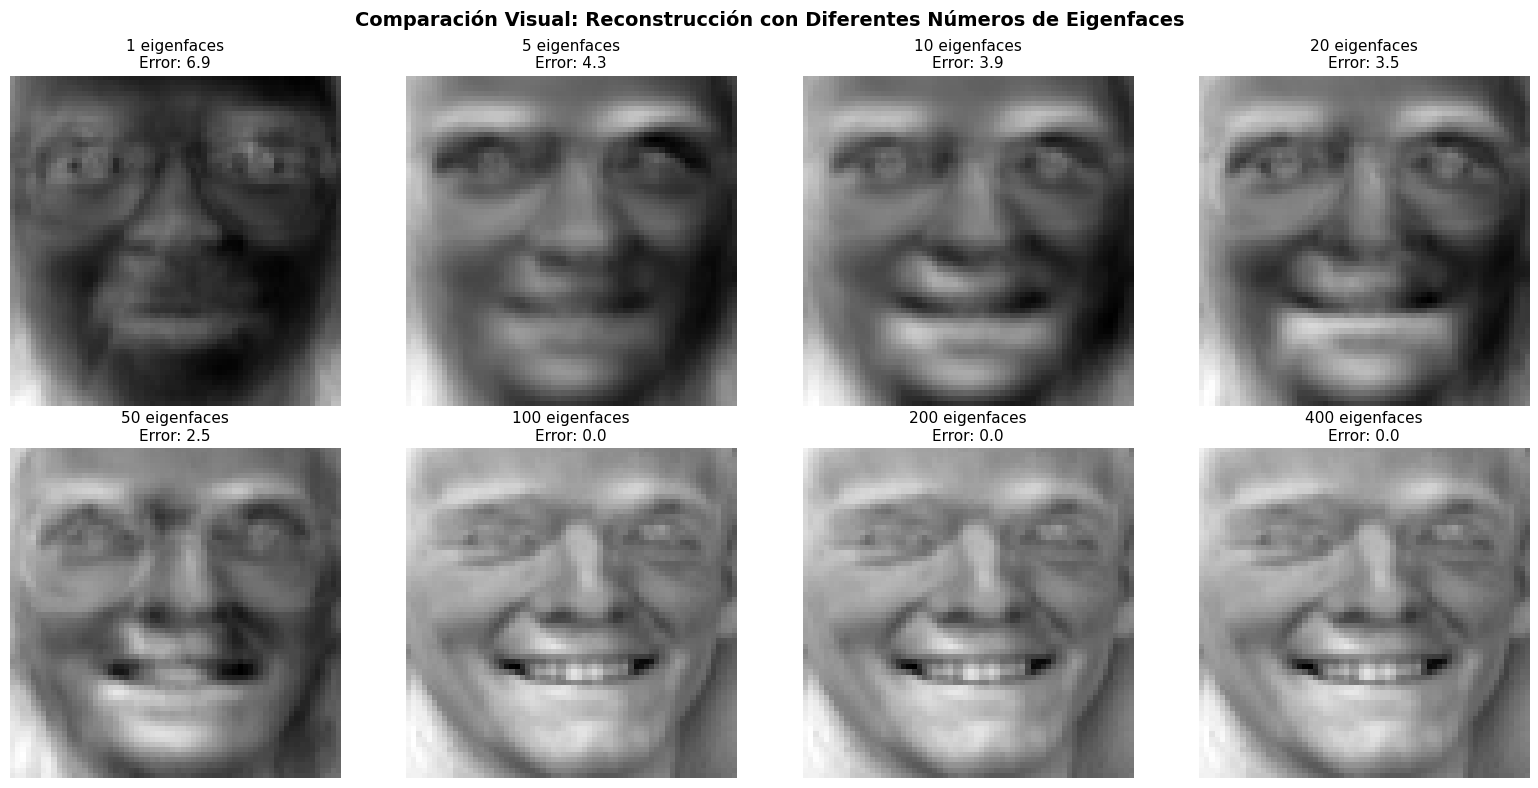

💡 Conclusión: El 'número mágico' parece estar entre 10-20 eigenfaces
   • Balance óptimo entre compresión y calidad
   • Captura la mayoría de características faciales importantes
   • Reduce dimensionalidad de 4096 a ~15 (272x compresión!)


In [12]:
# PASO 9: Comparación - ¿Cuántos Eigenfaces Necesitamos?
print("📈 PASO 9: Análisis - Número óptimo de eigenfaces para reconocimiento")
print("=" * 60)

# Probar diferentes números de eigenfaces para reconocimiento
eigenface_counts = [1, 2, 5, 10, 15, 20, 30, 40, 50]
recognition_accuracies = []

# Para simplificar, probaremos con varias imágenes de prueba
test_indices = [13, 23, 33, 43]  # Una imagen de diferentes personas

print("🧪 Probando reconocimiento con diferentes números de eigenfaces...")

for n_components_test in eigenface_counts:
    correct_matches = 0
    total_tests = len(test_indices)
    
    for test_idx in test_indices:
        if test_idx >= len(all_coefficients):
            continue
            
        test_person = test_idx // n_images_per_person
        test_coeffs = all_coefficients[test_idx][:n_components_test]
        
        # Calcular distancias usando solo n_components_test eigenfaces
        distances_limited = []
        for i, coeffs in enumerate(all_coefficients):
            if i != test_idx:
                dist = face_distance(test_coeffs, coeffs[:n_components_test])
                person_id = i // n_images_per_person
                distances_limited.append((i, person_id, dist))
        
        distances_limited.sort(key=lambda x: x[2])
        
        # Verificar si la imagen más similar es de la misma persona
        closest_person = distances_limited[0][1]
        if closest_person == test_person:
            correct_matches += 1
    
    accuracy = correct_matches / total_tests
    recognition_accuracies.append(accuracy)
    print(f"   Con {n_components_test:2d} eigenfaces: {accuracy:.1%} de precisión")

# Visualizar resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de precisión vs número de eigenfaces
ax1.plot(eigenface_counts, recognition_accuracies, 'o-', linewidth=3, markersize=8, color='purple')
ax1.set_title('Precisión de Reconocimiento vs Número de Eigenfaces', fontweight='bold', fontsize=14)
ax1.set_xlabel('Número de Eigenfaces Utilizados')
ax1.set_ylabel('Precisión del Reconocimiento')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1.1)
ax1.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='50% (azar)')
ax1.axhline(y=0.8, color='green', linestyle='--', alpha=0.7, label='80% (bueno)')
ax1.legend()

# Gráfico de compresión vs precisión
compression_ratios = [4096 / n for n in eigenface_counts]
ax2.plot(compression_ratios, recognition_accuracies, 's-', linewidth=3, markersize=8, color='orange')
ax2.set_title('Precisión vs Factor de Compresión', fontweight='bold', fontsize=14)
ax2.set_xlabel('Factor de Compresión (4096/n_eigenfaces)')
ax2.set_ylabel('Precisión del Reconocimiento')
ax2.set_xscale('log')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 1.1)

# Agregar anotaciones
best_idx = np.argmax(recognition_accuracies)
ax1.annotate(f'Mejor: {eigenface_counts[best_idx]} eigenfaces\n{recognition_accuracies[best_idx]:.1%} precisión', 
            xy=(eigenface_counts[best_idx], recognition_accuracies[best_idx]), 
            xytext=(eigenface_counts[best_idx]+10, recognition_accuracies[best_idx]-0.1),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

# Análisis de eficiencia
print(f"\n📊 Análisis de eficiencia:")
print(f"   📏 Dimensión original: 4096 píxeles")
print(f"   🎯 Con 10 eigenfaces: {4096/10:.0f}x compresión, {recognition_accuracies[eigenface_counts.index(10)]:.1%} precisión")
print(f"   🎯 Con 20 eigenfaces: {4096/20:.0f}x compresión, {recognition_accuracies[eigenface_counts.index(20)]:.1%} precisión")

# Mostrar comparación visual de reconstrucciones
sample_face_idx = 15
sample_face = faces_centered[sample_face_idx]
sample_coeffs = pca.transform([sample_face])[0]

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Comparación Visual: Reconstrucción con Diferentes Números de Eigenfaces', 
             fontsize=14, fontweight='bold')

reconstruction_counts = [1, 5, 10, 20, 50, 100, 200, 400]

for i, n_comp in enumerate(reconstruction_counts[:8]):
    row = i // 4
    col = i % 4
    
    if n_comp <= len(sample_coeffs):
        reconstruction = np.dot(sample_coeffs[:n_comp], eigenfaces[:n_comp])
        error = np.linalg.norm(sample_face - reconstruction)
    else:
        reconstruction = sample_face  # Si pedimos más eigenfaces de los que tenemos
        error = 0
    
    reconstruction_image = reconstruction.reshape((64, 64))
    
    axes[row, col].imshow(reconstruction_image, cmap='gray')
    axes[row, col].set_title(f'{n_comp} eigenfaces\nError: {error:.1f}', fontsize=11)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

print(f"💡 Conclusión: El 'número mágico' parece estar entre 10-20 eigenfaces")
print(f"   • Balance óptimo entre compresión y calidad")
print(f"   • Captura la mayoría de características faciales importantes")
print(f"   • Reduce dimensionalidad de 4096 a ~15 (272x compresión!)")

## 🤔 PREGUNTA 4 - Aplicación y Síntesis Final

❓ **Esta es la pregunta más importante. Trabajen juntos para responder:**

### Parte A: Comprensión Conceptual
1. **Definición Propia:** Con sus propias palabras, ¿qué es un eigenface y por qué se llama así?

2. **Relación con Álgebra Lineal:** ¿Cómo se relacionan los conceptos de esta actividad con la ecuación fundamental de valores propios $Av = \lambda v$?

3. **Interpretación Geométrica:** Si cada rostro es un punto en un espacio de 4096 dimensiones, ¿qué representan geométricamente los eigenfaces?

### Parte B: Análisis Práctico
4. **Número Óptimo:** Basándose en los resultados, ¿cuántos eigenfaces recomendarían usar en una aplicación real? Justifiquen considerando:
   - Precisión de reconocimiento
   - Eficiencia computacional
   - Uso de memoria

5. **Ventajas y Limitaciones:** Listen 3 ventajas y 3 limitaciones del método de eigenfaces.

### Parte C: Pensamiento Crítico
6. **Escalabilidad:** ¿Qué problemas podrían surgir si aplicamos este método a:
   - Un millón de rostros en lugar de 400?
   - Rostros con diferentes iluminaciones y ángulos?
   - Reconocimiento en tiempo real?

7. **Conexiones:** ¿En qué otras aplicaciones podrían ser útiles los conceptos de valores y vectores propios que vimos aquí?

---

**🎯 Objetivo:** Demostrar que comprenden tanto la matemática como las aplicaciones prácticas de eigenfaces.

## 🎉 ¡Felicitaciones! Han Completado la Actividad

### 📚 Resumen de lo que Aprendieron

En esta actividad han explorado uno de los ejemplos más elegantes de cómo el álgebra lineal se aplica al mundo real:

1. **Eigenfaces como Vectores Propios:** Cada eigenface es un vector propio de la matriz de covarianza de los rostros
2. **Valores Propios como Importancia:** Los valores propios más grandes indican las direcciones de mayor variación
3. **Combinaciones Lineales:** Cualquier rostro puede expresarse como combinación lineal de eigenfaces
4. **Reducción de Dimensionalidad:** De 4096 dimensiones a ~20 manteniendo la información esencial
5. **Aplicación Práctica:** Reconocimiento facial basado en distancias en el espacio reducido

### 🔗 Conexiones con Álgebra Lineal

- **Espacios Vectoriales:** Los rostros forman un espacio vectorial de dimensión 4096
- **Bases Ortogonales:** Los eigenfaces forman una base ortogonal para este espacio
- **Proyecciones:** Los coeficientes son proyecciones del rostro en cada eigenface
- **Diagonalización:** PCA es equivalente a diagonalizar la matriz de covarianza
- **Normas y Distancias:** Usamos la norma euclidiana para medir similitud entre rostros

### 🌟 El Poder del Álgebra Lineal

Esta actividad demuestra que conceptos aparentemente abstractos como valores y vectores propios tienen aplicaciones fascinantes en:
- Reconocimiento de patrones
- Compresión de datos
- Análisis de imágenes
- Inteligencia artificial
- Procesamiento de señales

### 📝 Para Reflexionar

Los eigenfaces fueron uno de los primeros métodos exitosos de reconocimiento facial automático (desarrollado en el MIT en los años 90). Aunque hoy usamos técnicas más avanzadas como deep learning, los principios matemáticos fundamentales siguen siendo los mismos.

**¡El álgebra lineal está en el corazón de la revolución tecnológica actual!**

---

### 📋 Checklist Final

- [ ] Ejecutaron todas las celdas de código
- [ ] Respondieron todas las preguntas marcadas con ❓
- [ ] Discutieron los resultados en pareja
- [ ] Comprenden la conexión con valores y vectores propios
- [ ] Pueden explicar eigenfaces con sus propias palabras

**Tiempo estimado total: 2 horas** ⏰